In [251]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pickle
from scipy.io import loadmat

In [252]:
def MetroSweep(lattice,J,B):
    for j in range(n):
        for i in range(n):
            #Energy of site i,j  
            Ei = -J*lattice[(i)%n][(j)%n]*(lattice[(i+1)%n][(j)%n]+lattice[(i-1)%n][(j)%n]+lattice[(i)%n][(j+1)%n]+lattice[(i)%n][(j-1)%n])
            #Energy of site i,j if flipped
            Ef = -Ei
            #Change in energy
            delE = Ef - Ei
            
            if delE <= 0:
                lattice[i%n][j%n] = -lattice[i%n][j%n]
            elif random.random() < np.exp(-B*delE):          
                    lattice[i%n][j%n] = -lattice[i%n][j%n]
    return lattice  

In [253]:
def Energy(lattice):
    energy = 0
    for i in range(n):
        for j in range(n):
            S = lattice[i,j]
            Ei = lattice[(i+1)%n][(j)%n]+lattice[(i-1)%n][(j)%n]+lattice[(i)%n][(j+1)%n]+lattice[(i)%n][(j-1)%n]
            energy += -Ei*S
    return energy/4.

In [266]:
def MagCalc(lattice):
    mag = np.sum(lattice)
    return mag

In [267]:
#Define variables
J = 1
k = 1
T = np.arange(0,4,0.1)
n=20 #size of lattice
t = 1000 #MC time steps
E,M,C,X = np.zeros(T.size), np.zeros(T.size), np.zeros(T.size), np.zeros(T.size)
n1, n2  = 1.0/(t*n*n), 1.0/(t*t*n*n) 
MagTot, EngTot = [],[]

In [268]:
for i in range(T.size):
    E1 = M1 = E2 = M2 = 0
    #Generate random initial configuration
    lattice = 2*np.random.randint(0,2,(n,n))-1;
    B=1.0/T[i]; B2=B*B;
    MagAr, EngAr, tPlot =[],[],[]
    
    for j in range(t):         
        MetroSweep(lattice,J,B)   

    for j in range(t):
        MetroSweep(lattice,J,B)          
        Ene = Energy(lattice)     
        Mag = MagCalc(lattice) 
        eng = Energy(lattice)
        tPlot.append(j)
        MagAr.append(Mag)
        EngAr.append(eng)

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene
        
    MagTot.append(MagAr)
    EngTot.append(EngAr)
    E[i] = n1*E1
    M[i] = n1*M1
    C[i] = (n1*E2 - n2*E1*E1)*B2
    X[i] = (n1*M2 - n2*M1*M1)*B

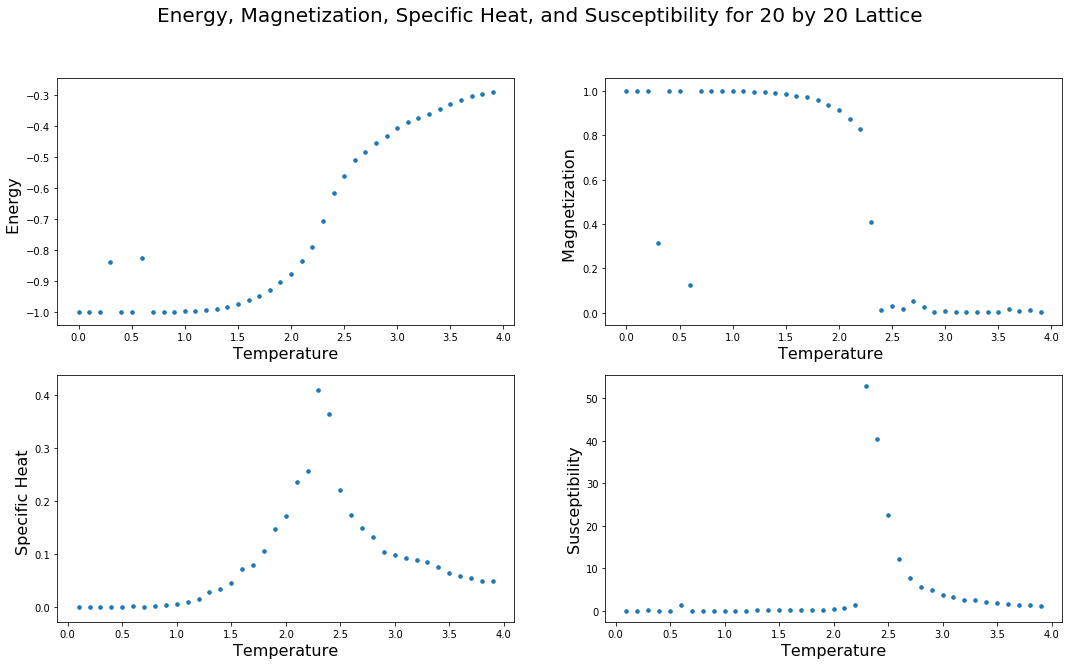

In [269]:
f = plt.figure(figsize=(18, 10)); # plot the calculated values   
f.suptitle('Energy, Magnetization, Specific Heat, and Susceptibility for 20 by 20 Lattice ', fontsize=20)
sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='.')
plt.xlabel("Temperature", fontsize=16);
plt.ylabel("Energy ", fontsize=16);         plt.axis('tight');

sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='.')
plt.xlabel("Temperature ", fontsize=16); 
plt.ylabel("Magnetization ", fontsize=16);   plt.axis('tight');

sp =  f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='.')
plt.xlabel("Temperature", fontsize=16);  
plt.ylabel("Specific Heat ", fontsize=16);   plt.axis('tight');   

sp =  f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='.')
plt.xlabel("Temperature", fontsize=16); 
plt.ylabel("Susceptibility", fontsize=16);   plt.axis('tight');
plt.savefig('20by20.pdf')

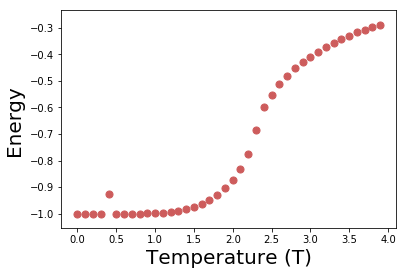

In [258]:
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

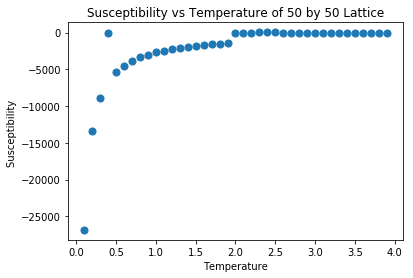

In [259]:
plt.scatter(T, X, s=50, marker='o')
plt.title("Susceptibility vs Temperature of 50 by 50 Lattice")
plt.xlabel("Temperature"); 
plt.ylabel("Susceptibility ");   plt.axis('tight');
plt.savefig('SusVTemp50by50.pdf')

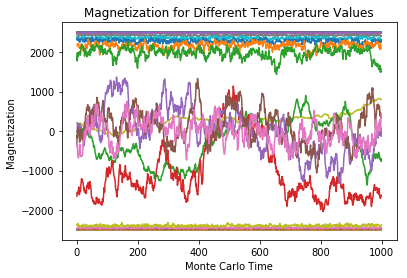

In [227]:
fewMag = []
newtPlot = []
for j in range(27):
    fewMag.append(MagTot[j])
    newtPlot.append(tPlot[j])
for i in range(len(fewMag)):
    plt.plot(tPlot,fewMag[i])
plt.title("Magnetization for Different Temperature Values")
plt.xlabel("Monte Carlo Time"); 
plt.ylabel("Magnetization ");   plt.axis('tight');
plt.savefig('MagTemp.pdf')

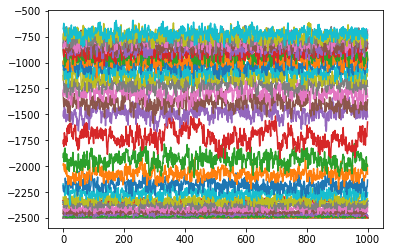

In [199]:
for i in range(len(EngTot)):
    plt.plot(tPlot,EngTot[i])

In [ ]:
Tc = 2.269
TcL = [2.12-Tc,2.34-Tc,2.35-Tc,2.36-Tc]
size = [20,30,40,50]
z = np.polyfit(np.log(size), np.log(np.abs(TcL)), 1)
v = -1/z[0]
print(z)
print(v)

In [ ]:
plt.scatter(np.log(size),np.log(np.abs(TcL)), marker='o')
plt.plot(np.log(size), np.log(size)*z[0]+z[1])
plt.title("$LogT_c(L)$ vs $Log(L)$")
plt.xlabel("$LogL$"); 
plt.ylabel("$LogT_c(L)$");  
plt.savefig('LogTc.pdf')